In [59]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools
import ast
data = pd.read_csv("winequality-red.csv") #Чтение данных 

In [60]:
data.shape

(1599, 12)

In [61]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


 Сколько в датасете объектов и признаков? Дать описание каждому признаку, если оно есть.
Делая вывод из проделланых операций, можно сказать, что датасет содержит 1599 объект и у каждого объекта 12 признаков.
Описание признаков:
1) fixed acidity - дробный признак, фиксированная кислотность вина
2) volatile acidity - дробный признак,летучая кислотность вина
3) citric acid - дробный признак, лимонная кислота
4) residual sugar - дробный признак,остаточный сахар
5) chlorides, - дробный признак,хлориды
6) free sulfur dioxide, - дробный признак,св диоксид серы
7) total sulfur dioxide - дробный признак,, весь диоскид серы
8) density -  дробный признак,плотность
9) pH- дробный признак,кислотность и щелочность
10) sulphates -  дробный признак, сульфаты
11) alcohol - дробный признак, алкоголь
12) quality - целочисленный признак , качество

In [63]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


2) Сколько категориальных признаков, какие?

В этом датасете присутствует категориальный признак : quality.

3) Столбец с макимальным количеством уникальных значений категориального признака?

В данном случае столбец с максимальным количеством уникальных значений - quality (  от 0 до 10 качество вина)

4) Есть ли бинарные признаки?

мы видим то что в данной дата базе нет бинарных признаков

In [64]:
np.sum(pd.isnull(data))

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

5) Есть ли пропуски?

Исходя из проделанной операции можно сделать вывод, что пропусков нет

6) Сколько объектов с пропусками?

0

7) Столбец с максимальным количеством пропусков?

-

In [65]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


8 Есть ли на ваш взгляд выбросы, аномальные значения?

Просматривая данные таблицы, можно сделать вывод о том, что возможно есть аномалия в total sulfur dioxide очень высокий в max

In [66]:
data_cleaned = data.copy()
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [67]:
    del data_cleaned['residual sugar']
    del data_cleaned['free sulfur dioxide']
    del data_cleaned['pH']
    data_cleaned

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5


In [68]:
#нормализация 
data_cleaned["fixed acidity"] = (data_cleaned["fixed acidity"] - data_cleaned["fixed acidity"].mean()) / data_cleaned["fixed acidity"].std()
data_cleaned["volatile acidity"] = (data_cleaned["volatile acidity"] - data_cleaned["volatile acidity"].mean()) / data_cleaned["volatile acidity"].std()
data_cleaned["citric acid"] = (data_cleaned["citric acid"] - data_cleaned["citric acid"].mean()) / data_cleaned["citric acid"].std()
data_cleaned["chlorides"] = (data_cleaned["chlorides"] - data_cleaned["chlorides"].mean()) / data_cleaned["chlorides"].std()
data_cleaned["citric acid"] = (data_cleaned["citric acid"] - data_cleaned["citric acid"].mean()) / data_cleaned["citric acid"].std()
data_cleaned["density"] = (data_cleaned["density"] - data_cleaned["density"].mean()) / data_cleaned["density"].std()
data_cleaned["sulphates"] = (data_cleaned["sulphates"] - data_cleaned["sulphates"].mean()) / data_cleaned["sulphates"].std()
data_cleaned["alcohol"] = (data_cleaned["alcohol"] - data_cleaned["alcohol"].mean()) / data_cleaned["alcohol"].std()
data_cleaned["quality"] = (data_cleaned["quality"] - data_cleaned["quality"].mean()) / data_cleaned["quality"].std()

In [69]:
data_cleaned.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.243630,34.0,0.558100,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.223805,67.0,0.028252,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,0.096323,54.0,0.134222,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.264878,60.0,0.664069,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.243630,34.0,0.558100,-0.579025,-0.959946,-0.787576


In [70]:
data_cleaned.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-1.570643e-14,-1.590973e-15,-7.915286e-17,5.098590e-15,46.467792,4.946064e-13,-2.175036e-15,2.580411e-14,1.081756e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,32.895324,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.603443e+00,6.000000,-3.537625e+00,-1.935902e+00,-1.898325e+00,-3.264143e+00
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-3.711129e-01,22.000000,-6.075656e-01,-6.380200e-01,-8.661079e-01,-7.875763e-01
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-1.798892e-01,38.000000,1.759533e-03,-2.250577e-01,-2.092427e-01,4.507074e-01
75%,5.056370e-01,6.264921e-01,7.650078e-01,5.382858e-02,62.000000,5.766445e-01,4.238832e-01,6.352984e-01,4.507074e-01
max,4.353787e+00,5.876138e+00,3.742403e+00,1.112355e+01,289.000000,3.678904e+00,7.916200e+00,4.201138e+00,2.927275e+00


8) Здесь мы видим, то что максимальное срелние значение нормированных признаков в total sulfur dioxide

10) Выберите целевую переменную:

In [71]:
 target = data.quality
data = data.drop(['residual sugar','free sulfur dioxide','pH'],axis = 1)

In [72]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target , test_size = 0.30, random_state = 42)

In [74]:
X_train

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
925,8.6,0.220,0.36,0.064,77.0,0.99604,0.87,11.0,7
363,12.5,0.460,0.63,0.071,15.0,0.99880,0.87,10.2,5
906,7.2,0.540,0.27,0.084,78.0,0.99640,0.71,11.0,5
426,6.4,0.670,0.08,0.045,48.0,0.99490,0.49,11.4,6
1251,7.5,0.580,0.14,0.077,60.0,0.99630,0.59,9.8,5
...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,0.058,10.0,0.99770,0.63,10.4,6
1294,8.2,0.635,0.10,0.073,60.0,0.99638,0.75,10.9,6
860,7.2,0.620,0.06,0.077,85.0,0.99746,0.54,9.5,5
1459,7.9,0.200,0.35,0.054,15.0,0.99458,0.80,11.9,7


In [75]:
pca = PCA()
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [76]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,data.columns)))

1 component: 99.57% of initial variance
-0.005 x fixed acidity + 0.000 x volatile acidity + 0.000 x citric acid + 0.000 x chlorides + 1.000 x total sulfur dioxide + 0.000 x density + 0.000 x sulphates + -0.007 x alcohol + -0.005 x quality
2 component: 0.27% of initial variance
0.994 x fixed acidity + -0.026 x volatile acidity + 0.077 x citric acid + 0.003 x chlorides + 0.005 x total sulfur dioxide + 0.001 x density + 0.017 x sulphates + -0.056 x alcohol + 0.040 x quality
3 component: 0.12% of initial variance
0.023 x fixed acidity + -0.050 x volatile acidity + 0.036 x citric acid + -0.008 x chlorides + 0.009 x total sulfur dioxide + -0.001 x density + 0.031 x sulphates + 0.857 x alcohol + 0.510 x quality
4 component: 0.04% of initial variance
0.066 x fixed acidity + 0.063 x volatile acidity + -0.005 x citric acid + -0.001 x chlorides + -0.000 x total sulfur dioxide + -0.000 x density + -0.043 x sulphates + 0.511 x alcohol + -0.854 x quality
5 component: 0.0% of initial variance
-0.065 

Для обьяснения 99 % дисперсии после применения метода PCA хватает одной компоненты.


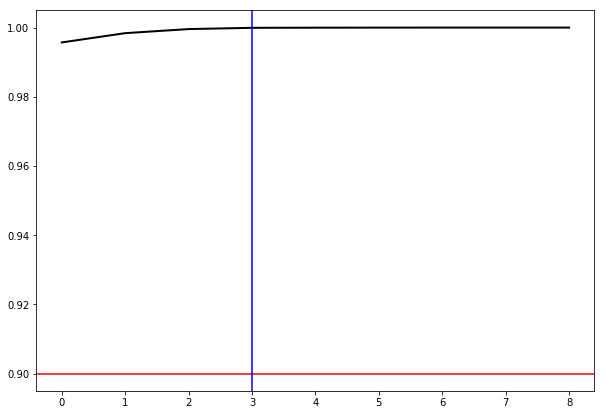

In [364]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, c='r')
plt.axvline(3, c='b')